In [195]:
import requests
import json
import urllib.request
import bs4
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
url = "https://www.trustpilot.com/review/www.tripadvisor.com"
source = urllib.request.urlopen(url).read()
soup = bs4.BeautifulSoup(source, "lxml")

In [197]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<link crossorigin="" href="https://googleads.g.doubleclick.net/" rel="preconnect"/>
<link crossorigin="" href="https://www.googleadservices.com/" rel="preconnect"/>
<link crossorigin="" href="https://www.googletagmanager.com/" rel="preconnect"/>
<link crossorigin="" href="https://cdn.trustpilot.net/" rel="preconnect"/>
<link crossorigin="" href="https://api.amplitude.com/" rel="preconnect"/>
<link crossorigin="" href="//user-images.trustpilot.com/" rel="preconnect"/>
<link crossorigin="" href="https://consumer-assets.trustpilot.com" rel="preconnect"/>
<script crossorigin="anonymous" src="https://browser.sentry-cdn.com/4.6.5/bundle.min.js"></script>
<script>
Sentry.init({
    dsn: 'https://6f5671770e934b39a447418d18a28092@sentry.io/1425086',
    sampleRate: 0.03,
    environment: 'Production',
    release: 'consumersite-consumersiteweb@3895.0'
});
Sentry.configureScope(function(scope) {
    scope.setTag("route", "/review/{businessUnitName}");
    

In [198]:
b = soup.find_all('a')
for link in b:
    print (link.get('href'))
#b[80]

/
/categories
#
/users/settings
https://support.trustpilot.com/hc/categories/200128688-Support-for-Reviewers
#
None
/users/connect
/users/connect?signup=True
https://us.business.trustpilot.com?utm_medium=consumer&utm_source=for_companies&utm_campaign=consumer_cta
None
None
None
http://www.TripAdvisor.com?utm_medium=company_profile&utm_source=trustpilot&utm_campaign=logo_click
http://www.TripAdvisor.com?utm_medium=company_profile&utm_source=trustpilot&utm_campaign=logo_click
http://www.TripAdvisor.com?utm_medium=company_profile&utm_source=trustpilot&utm_campaign=logo_click
/evaluate/www.tripadvisor.com
http://www.TripAdvisor.com?utm_medium=company_profile&utm_source=trustpilot&utm_campaign=logo_click
/evaluate/www.tripadvisor.com
/evaluate/www.tripadvisor.com
/evaluate/www.tripadvisor.com
https://support.trustpilot.com/hc/en-us/articles/207312237
/users/5cc5f12e8eb10ee2a6abee61
https://support.trustpilot.com/hc/en-us/articles/207312237
/users/5cc494be3e992b5dba32e806
https://support.tru

In [199]:
reviewtitle = soup.find_all('a', class_='link link--large link--dark')

In [200]:
for i in range(len(reviewtitle)):
    print(reviewtitle[i].text)

I don't know what Tripadvisor have done but it is not good...
If you want honest reviews or opinions…
Compared to Yelp and Google
We had the worst blizzard in 40 years…
Unfortunately I got in involved with…
Trip adviser for small businesses has had it's day
"Use Another Booking Site!
Disappointed and fraud?
We use trip advisor all the time and…
I would never recommend TripAdvisor…
Beware.. bait and switch
TRIPADVISOR WILL NOT HELP PEOPLE MAKING…
Don’t trust tripadvisor!
Best onine travel agents by mile
Excellent to use and trust different…
Disgraceful company


In [201]:
reviewcontent = soup.find_all('p', class_='review-content__text')

In [202]:
for i in range(len(reviewcontent)):
    print(reviewcontent[i].text)


            Like others here, I have found myself in a position to post a review because getting any service from Tripadvisor directly seems to be not possible.  Tried to do an online support request, the automated response states "we won’t respond to feedback or bug reports individually" even though I submitted a question!  Tried to post to Facebook - no option on their page.I am a consumer, not a business and used to find the site really helpful in being able to plan my trips including hotels and what to do and also be able to share them with my travelling group for collaborative planning.  Features that used to be a great part of your site are no longer, they have gone, no longer can I assign activities or places to specific dates.  I can only do this if I book the place / activity etc. through Tripadvisor....BTW, how do you book a location with Tripadvisor??I finally get a response after my 3rd attempt, again generic but this time saying I will get a response in 3-5 business days.

In [203]:
nextpage = soup.find_all('a', href="/review/www.tripadvisor.com?page=2")

print(nextpage)

[<a class="pagination-page" data-page-number="2" href="/review/www.tripadvisor.com?page=2">2</a>, <a class="button button--primary next-page" data-page-number="next-page" href="/review/www.tripadvisor.com?page=2" rel="next">Next page</a>]


In [204]:
print(nextpage[1].text)

Next page


In [205]:
final_list=[]
url = 'https://www.trustpilot.com/review/www.tripadvisor.com'
#making a request to get the number of reviews
r=requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
review_count_h2=soup.find('h2',class_="header--inline").text
#there are 20 reviews per page so pages can be calculated as
pages=int(math.ceil(review_count/20))
#change range to 1 to pages+1
for pg in range(1, pages+1):
  pg = url + '?page=' + str(pg)
  r=requests.get(pg)
  soup = BeautifulSoup(r.text, 'lxml')
  for paragraph in soup.find_all('section',class_='review__content'):
     try:
         title=paragraph.find('h2',class_='review-content__title').text.strip()
         content=paragraph.find('p',class_='review-content__text').text.strip()
         datedata= json.loads(paragraph.find('div',class_='review-content-header__dates').text)
         date=datedata['publishedDate'].split('T')[0]
         rating_class=paragraph.find('div',class_='star-rating')['class']
         rating=rating_class[1].split('-')[-1]
         final_list.append([title,content,date,rating])
     except AttributeError:
        pass
df = pd.DataFrame(final_list,columns=['Title','Content','Date','Rating'])
print(df)

                                                 Title  \
0    I don't know what Tripadvisor have done but it...   
1              If you want honest reviews or opinions…   
2                          Compared to Yelp and Google   
3               We had the worst blizzard in 40 years…   
4                Unfortunately I got in involved with…   
5    Trip adviser for small businesses has had it's...   
6                           "Use Another Booking Site!   
7                              Disappointed and fraud?   
8                We use trip advisor all the time and…   
9                 I would never recommend TripAdvisor…   
10                            Beware.. bait and switch   
11            TRIPADVISOR WILL NOT HELP PEOPLE MAKING…   
12                            Don’t trust tripadvisor!   
13                    Best onine travel agents by mile   
14               Excellent to use and trust different…   
15                                 Disgraceful company   
16   It used t

In [206]:
df['Review No.'] = df.index + 1

#Added a column to get the accurate review number

In [207]:
df['Year']= (df['Date'].str.split('-').str[0])
df['Month']= (df['Date'].str.split('-').str[1])

#Cheking to see if this attribute co ectly added th

In [208]:
df.head()

,Title,Content,Date,Rating,Review No.,Year,Month
0,I don't know what Tripadvisor have done but it...,"Like others here, I have found myself in a pos...",2019-04-09,1,1,2019,04
1,If you want honest reviews or opinions…,If you want honest reviews or opinions Tripadv...,2019-04-07,1,2,2019,04
2,Compared to Yelp and Google,"Compared to Yelp and Google, they have far few...",2019-03-22,3,3,2019,03
3,We had the worst blizzard in 40 years…,We had the worst blizzard in 40 years that clo...,2019-03-17,1,4,2019,03
4,Unfortunately I got in involved with…,Unfortunately I got in involved with Trapadvis...,2019-03-12,1,5,2019,03


In [231]:
January = df[df['Month'] == '01']

Feb = df[df['Month'] == '02']

Mar = df[df['Month'] == '03']

April = df[df['Month'] == '04']

May= df[df['Month'] == '05']

June= df[df['Month'] == '06']

July= df[df['Month'] == '07']

Aug= df[df['Month'] == '08']

Sep= df[df['Month'] == '09']

Oct= df[df['Month'] == '10']

Nov= df[df['Month'] == '11']

Dec= df[df['Month'] == '12']

In [232]:
len(April) 

#I wanted to see how many new reviews there were in april total, there were a total of 15 reviews!

13

In [233]:
print(April)

                                                 Title  \
0    I don't know what Tripadvisor have done but it...   
1              If you want honest reviews or opinions…   
238   I would never do business with Tripadvisor again   
239            I am owner in Russia St.Petersburg one…   
240  I been blessed with TripAdvisor of blue cab Ma...   
241  Tripadvisor holds back (justified) refund whic...   
242           Can't always trust a tripadvisor review!   
366               The Hearthstone Inn,Dartmouth Nova …   
367          Fairfield Inn Columbus GA 4510 E Armour …   
368                 This review is for the Quality Inn   
369                                  A DAY TO REMEMBER   
370                                    Excellent hotel   
371                           very friendly atmosphere   

                                               Content        Date Rating  \
0    Like others here, I have found myself in a pos...  2019-04-09      1   
1    If you want honest reviews o

In [212]:
#I also wanted to look at the number of five star reviews in April

April[April['Rating'] == '5']

,Title,Content,Date,Rating,Review No.,Year,Month
240,I been blessed with TripAdvisor of blue cab Ma...,I been blessed with TripAdvisor and good revie...,2018-04-25,5,241,2018,04
367,Fairfield Inn Columbus GA 4510 E Armour …,Fairfield Inn Columbus GA 4510 E Armour Rd. ve...,2017-04-28,5,368,2017,04
368,This review is for the Quality Inn,"This review is for the Quality Inn, Beaver, Ut...",2017-04-24,5,369,2017,04
369,A DAY TO REMEMBER,We went on a trip to the Blue lagoon and Gozo ...,2017-04-14,5,370,2017,04
370,Excellent hotel,Excellent hotel. Our first time staying and we...,2017-04-14,5,371,2017,04
371,very friendly atmosphere,Very friendly atmosphere. Excellent service. V...,2017-04-13,5,372,2017,04


In [235]:
JanFiveStar = January[January['Rating'] == '5']
FebFiveStar = Feb[Feb['Rating'] == '5']
MarFiveStar = Mar[Mar['Rating'] == '5']
AprilFiveStar = April[April['Rating'] == '5']
MayFiveStar = May[May['Rating'] == '5']
JunFiveStar = June[June['Rating'] == '5']
JulyFiveStar = July[July['Rating'] == '5']
AugFiveStar = Aug[Aug['Rating'] == '5']
SepFiveStar = Sep[Sep['Rating'] == '5']
OctFiveStar = Oct[Oct['Rating'] == '5']
NovFiveStar = Nov[Nov['Rating'] == '5']
DecFiveStar = Dec[Dec['Rating'] == '5']



JanPercent = 100*(len(JanFiveStar)/len(January)) # here we've determined that the proportion of five star ratings for 
FebPercent = 100*(len(FebFiveStar)/len(Feb))
MarPercent = 100*(len(MarFiveStar)/len(Mar))
AprPercent = 100*(len(AprilFiveStar)/len(April))
MayPercent = 100*(len(MayFiveStar)/len(May))
JunPercent = 100*(len(JunFiveStar)/len(June))
JulyPercent = 100*(len(JulyFiveStar)/len(July))
AugPercent = 100*(len(AugFiveStar)/len(Aug))
SepPercent = 100*(len(SepFiveStar)/len(Sep))
OctPercent = 100*(len(OctFiveStar)/len(Oct))
NovPercent = 100*(len(NovFiveStar)/len(Nov))
DecPercent = 100*(len(DecFiveStar)/len(Dec))

_df_new_ = pd.concat([January, Feb, Mar, April, May, June, July, Aug, Sep, Nov, Dec], axis=1, join='outer', sort=False)



#tripadvisor in April was 53.333 percent!

#Trip advisor had a good run in April

In [236]:
print(_df_new_)

                                   Title  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
5                                    NaN   
6                                    NaN   
7                                    NaN   
8                                    NaN   
9                                    NaN   
10                                   NaN   
11                                   NaN   
12                                   NaN   
13                                   NaN   
14                                   NaN   
15                                   NaN   
16                                   NaN   
17                                   NaN   
18                                   NaN   
19                                   NaN   
20                                   NaN   
21                              

In [214]:
dfMonths = df.groupby('Month', as_index=False).mean()



dfnew = df.groupby('Month').count()

dfnew.drop(['Review No.', 'Content', 'Year','Date','Rating'], axis=1, inplace=True)

In [215]:
df['Month'].value_counts()

01    168
12    104
02     28
03     21
10     20
07     15
04     13
06     12
09     11
11      9
08      8
05      7
Name: Month, dtype: int64

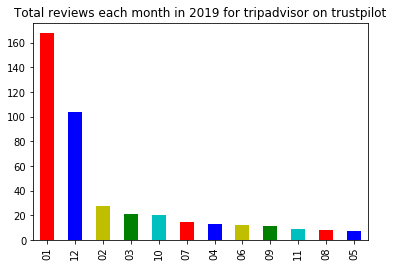

In [227]:
df['Month'].value_counts().plot(kind= 'bar', y= 'number of reviews', x= 'month', title= 'Total reviews each month in 2019 for tripadvisor on trustpilot', color=('r','b','y','g','c'))

#Here we can determine the amount of reviews per month on tripadvosr on trustpilot,

#There appears to be the most reviews at the times January and December for tripadvisor on trustpilot.

In [217]:
#I also want to investigate whether there is a correlation between month and review rating

df.groupby('Month').sum()

,Review No.
Month,
01,19972
02,4983
03,3822
04,3425
05,2041
06,3422
07,4660
08,2012
09,3001


In [228]:
print(January)

a = January.groupby('Rating')

print(a.count())

                                                 Title  \
26                              Review on Trip Advisor   
27                                       Poor attitude   
28                 I am writing about Marino the Pool…   
29                                           Great job   
30     Only post good reviews and remove bad reviews!!   
31                  If I could give zero stars I would   
32      Trip Advisor - Trusted Resource for the Family   
33                              Undeniably wonderful ~   
34                  Great source of travel information   
35                                    Good review tool   
36                                    My point of view   
37                             No Bells Just Whistles!   
38                                       My First Stop   
39                            Site is too hard to use.   
40                            I like TripAdvisor a lot   
41                                        Trip Advisor   
42            

In [230]:
#a.plot(kind= 'bar', y= 'len(Title)', x= 'Month', title= 'Total reviews each month in 2019 for tripadvisor on trustpilot')


January[January['Rating'] == '5']

c = January[January['Rating'] == '5']

JanuaryFiveStar= 100*(len(c)/len(January))

#Here we can see that in January, a significant portion of ratings for Tripadvisor on trustpilot are five star. 


70.23809523809523